<a href="https://colab.research.google.com/github/tzsoulcap/Agricultural-Product-Images-for-Super-AI-Engineer-SS3/blob/master/Agricultural_Product_Images_for_Super_AI_Engineer_SS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle Score

I'm late submission

This is private score of **top 10**

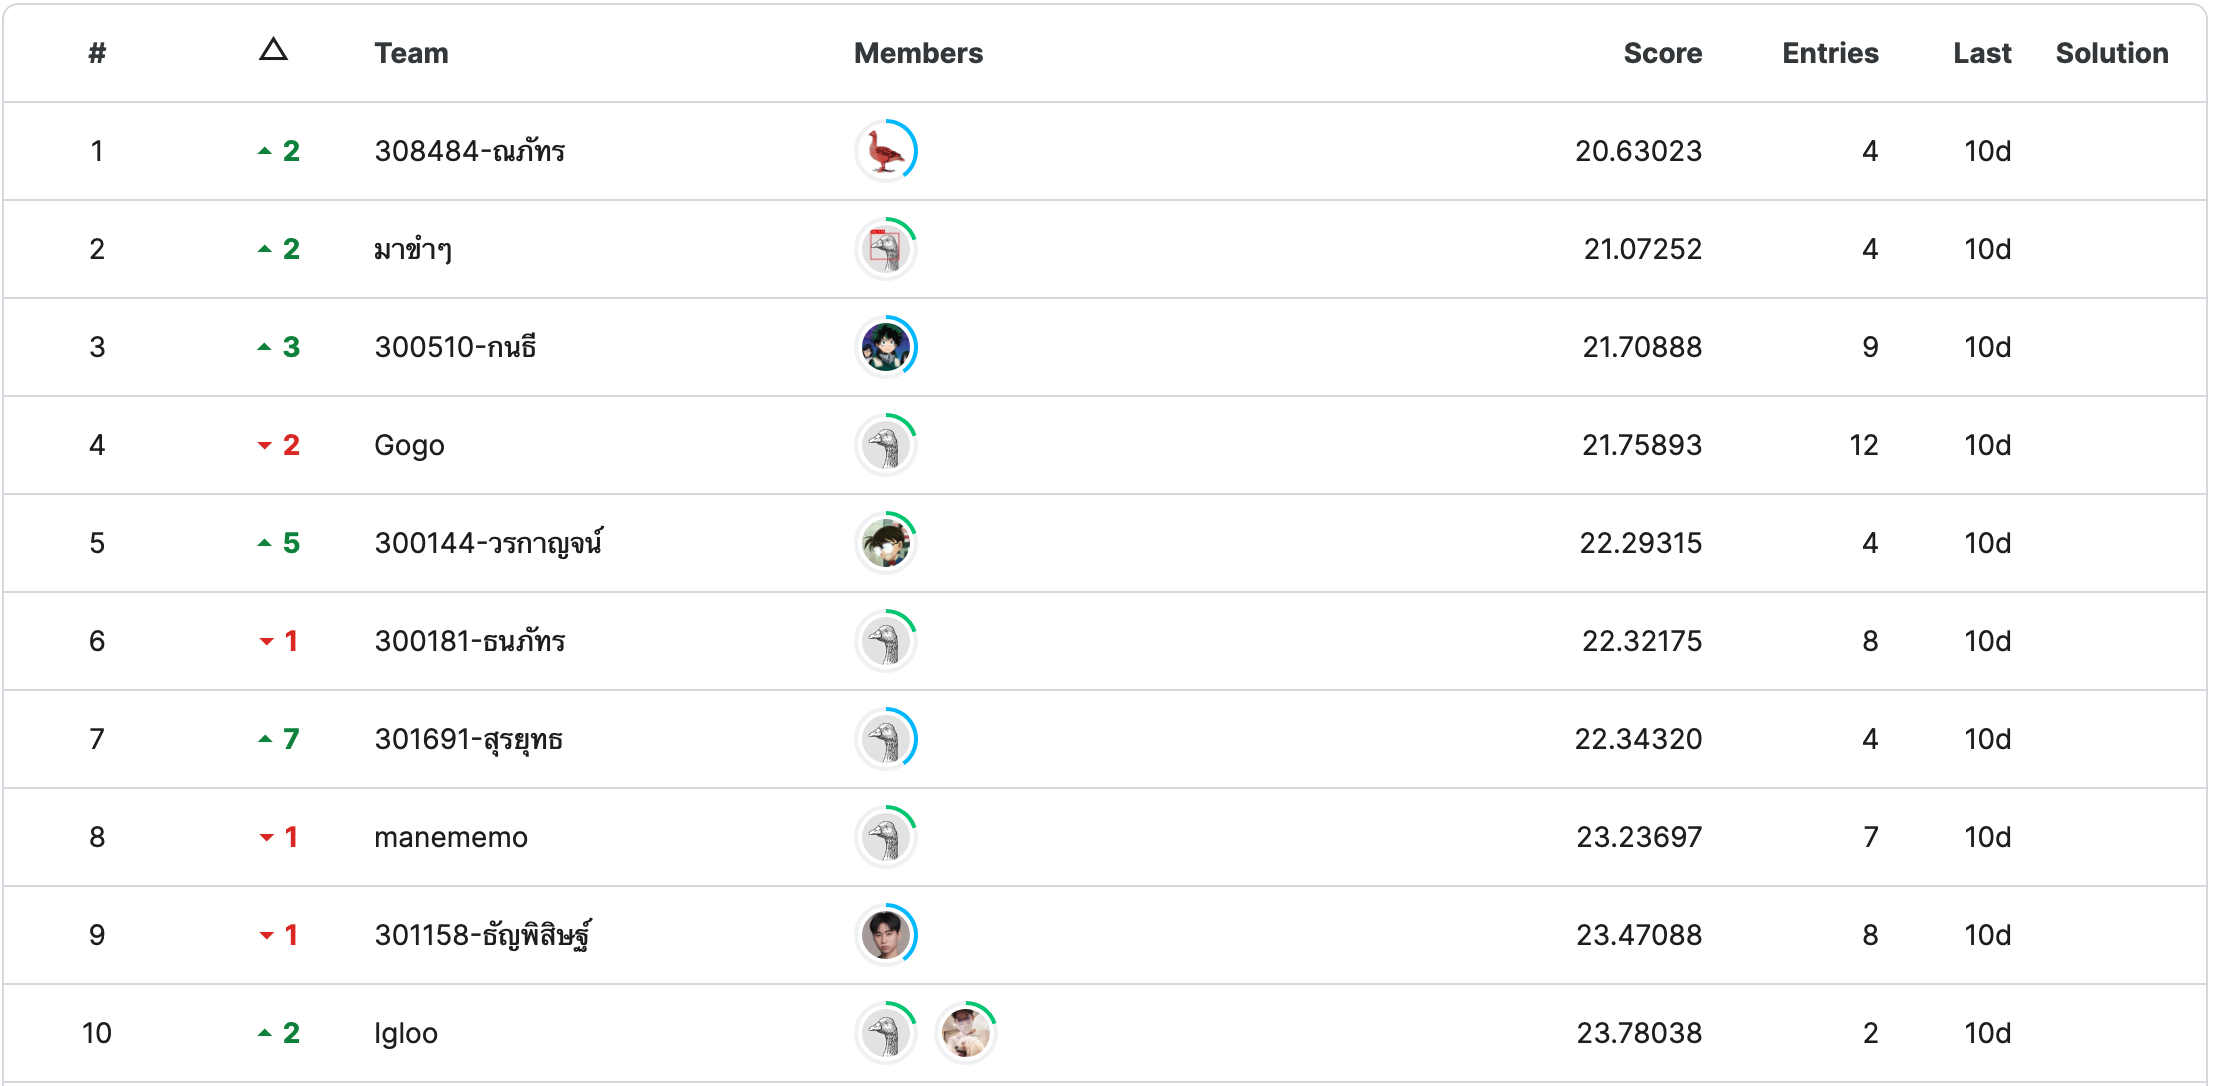

and this is **me**

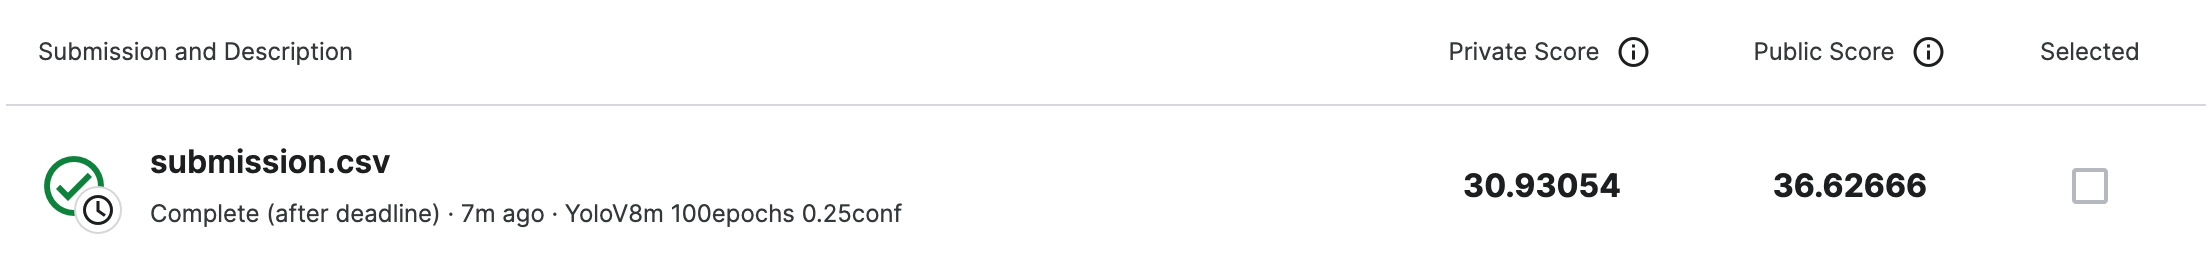

## install library

In [1]:
!pip install ultralytics==8.0.134 roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=db1ff352747155bb1e7e7028645e8ea2d284e8ae6aaf45015e2205c775f9e37e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## setup kaggle

In [2]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/hackathon/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c wheat-head-for-superai-3

100% 3.46G/3.47G [00:39<00:00, 75.9MB/s]
100% 3.47G/3.47G [00:39<00:00, 94.6MB/s]


In [4]:
!mkdir datasets
!unzip /content/wheat-head-for-superai-3.zip -d /content/datasets

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: /content/datasets/Wheat-Head/train/7670a46305a8fa6768a868f130b2ebcd5ca5c4f0f672393a38b602d71d741b51.png  
  inflating: /content/datasets/Wheat-Head/train/7670a46305a8fa6768a868f130b2ebcd5ca5c4f0f672393a38b602d71d741b51.xml  
  inflating: /content/datasets/Wheat-Head/train/76895b76e9eb429969e8124a846419536191c7e8c3c271b3171407f6016fa755.png  
  inflating: /content/datasets/Wheat-Head/train/76895b76e9eb429969e8124a846419536191c7e8c3c271b3171407f6016fa755.xml  
  inflating: /content/datasets/Wheat-Head/train/76a310f2082bd808be0fb6d651a034673fb02176b43d5bb94a3be7ec97e92fdb.png  
  inflating: /content/datasets/Wheat-Head/train/76a310f2082bd808be0fb6d651a034673fb02176b43d5bb94a3be7ec97e92fdb.xml  
  inflating: /content/datasets/Wheat-Head/train/76c2d5f53134f097da926a359e259b9bf4e24949addb6962adaed7f9fd39d254.png  
  inflating: /content/datasets/Wheat-Head/train/76c2d5f53134f097da926a359e259b9bf4e24949addb6962adaed7f9fd39d2

## create dataset for Yolo format

In [5]:
import pandas as pd
import numpy as np
import xml.etree.cElementTree as et
import os
import shutil

In [6]:
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**List file name**

In [ ]:
xml_files = list(filter(lambda x: x.endswith('.xml'), os.listdir('/content/datasets/Wheat-Head/train')))
xml_files = list(map(lambda x: x[:-4], xml_files))

**Split data**

In [ ]:
train, test = train_test_split(xml_files, test_size=0.1, random_state=99)
train, valid = train_test_split(train, test_size=0.1, random_state=99)

In [ ]:
(len(train), len(test), len(valid))

(3691, 456, 411)

**convert bbox from pascal voc to yolo format**

In [ ]:
def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    return f"0 {((x2 + x1)/(2*image_w))} {((y2 + y1)/(2*image_h))} {(x2 - x1)/image_w} {(y2 - y1)/image_h}"

In [ ]:
!mkdir /content/data_yolo
!mkdir /content/data_yolo/train
!mkdir /content/data_yolo/test
!mkdir /content/data_yolo/valid
!mkdir /content/data_yolo/train/images
!mkdir /content/data_yolo/train/labels
!mkdir /content/data_yolo/test/images
!mkdir /content/data_yolo/test/labels
!mkdir /content/data_yolo/valid/images
!mkdir /content/data_yolo/valid/labels

**datasets YoloV8 format**

    data_yolo
    |-> data.yaml
    |-> train
        |-> images (.png, .jpg)
        |-> labels (.txt)
    |-> test
        |-> images (.png, .jpg)
        |-> labels (.txt)
    |-> valid
        |-> images (.png, .jpg)
        |-> labels (.txt)

In [ ]:
for f_name in train:
    shutil.copyfile(f"/content/datasets/Wheat-Head/train/{f_name}.png", f"/content/data_yolo/train/images/{f_name}.png")
    tree = et.parse(f"/content/datasets/Wheat-Head/train/{f_name}.xml")
    root = tree.getroot()
    all_obj = root.findall('object')
    boxes = []
    for obj in all_obj:
        for bbox in obj.iter('bndbox'):
            boxes.append(pascal_voc_to_yolo(int(bbox[0].text), int(bbox[1].text), int(bbox[2].text), int(bbox[3].text), 512, 512))
    f = open(f'/content/data_yolo/train/labels/{f_name}.txt', 'w')
    f.write('\n'.join(boxes))
    f.close()

In [ ]:
for f_name in test:
    shutil.copyfile(f"/content/datasets/Wheat-Head/train/{f_name}.png", f"/content/data_yolo/test/images/{f_name}.png")
    tree = et.parse(f"/content/datasets/Wheat-Head/train/{f_name}.xml")
    root = tree.getroot()
    all_obj = root.findall('object')
    boxes = []
    for obj in all_obj:
        for bbox in obj.iter('bndbox'):
            boxes.append(pascal_voc_to_yolo(int(bbox[0].text), int(bbox[1].text), int(bbox[2].text), int(bbox[3].text), 512, 512))
    f = open(f'/content/data_yolo/test/labels/{f_name}.txt', 'w')
    f.write('\n'.join(boxes))
    f.close()

In [ ]:
for f_name in valid:
    shutil.copyfile(f"/content/datasets/Wheat-Head/train/{f_name}.png", f"/content/data_yolo/valid/images/{f_name}.png")
    tree = et.parse(f"/content/datasets/Wheat-Head/train/{f_name}.xml")
    root = tree.getroot()
    all_obj = root.findall('object')
    boxes = []
    for obj in all_obj:
        for bbox in obj.iter('bndbox'):
            boxes.append(pascal_voc_to_yolo(int(bbox[0].text), int(bbox[1].text), int(bbox[2].text), int(bbox[3].text), 512, 512))
    f = open(f'/content/data_yolo/valid/labels/{f_name}.txt', 'w')
    f.write('\n'.join(boxes))
    f.close()

In [ ]:
def yolo_to_pascal_voc(x_center, y_center, w, h,  image_w=512, image_h=512):
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w)/2
    y1 = ((2 * y_center * image_h) - h)/2
    x2 = x1 + w
    y2 = y1 + h
    return [x1, y1, x2, y2]

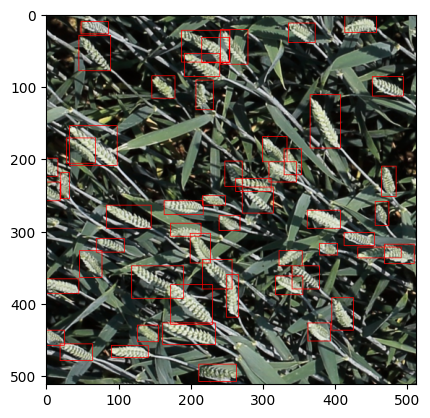

In [ ]:
f = open('/content/data_yolo/train/labels/0426952b511fd68839c0b1ee6a27fac85faad765e91e4ce09148dc345c8ba039.txt', 'r')
text = f.readlines()
f.close()
all_bbox = list(map(lambda x: x.split('\n')[0], text))
all_bbox = list(map(lambda x: x.split(' ')[1:], all_bbox))
img = cv2.imread('/content/data_yolo/train/images/0426952b511fd68839c0b1ee6a27fac85faad765e91e4ce09148dc345c8ba039.png')

for b in all_bbox:
    x1, y1, x2, y2 = yolo_to_pascal_voc(float(b[0]), float(b[1]), float(b[2]), float(b[3]))
    # if float(b[0]) == 0.05078125:
        # print('yes')
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
df = pd.DataFrame({'box': text})
df[df['box']=='0 0.05078125 0.462890625 0.0234375 0.0703125\n']

box
27  0 0.05078125 0.462890625 0.0234375 0.0703125\n
49  0 0.05078125 0.462890625 0.0234375 0.0703125\n

## train model

In [ ]:
!nvidia-smi

Tue Aug  1 10:33:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/data_yolo/data.yaml epochs=100 imgsz=512

100% 49.7M/49.7M [00:00<00:00, 187MB/s]
New https://pypi.org/project/ultralytics/8.0.145 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data_yolo/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augm

In [ ]:
!cp -av "/content/runs" "/content/drive/MyDrive/Yolo/Agricultural Product/run"

'/content/runs' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run'
'/content/runs/detect' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect'
'/content/runs/detect/train' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/train'
'/content/runs/detect/train/weights' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/train/weights'
'/content/runs/detect/train/weights/last.pt' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/train/weights/last.pt'
'/content/runs/detect/train/weights/best.pt' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/train/weights/best.pt'
'/content/runs/detect/train/args.yaml' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/train/args.yaml'
'/content/runs/detect/train/events.out.tfevents.1690869604.65bc4d240b35.3201.0' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/train/events.out.tfevents.1690869604.65bc4d240b35.3201.0'
'/content/runs/detect/train/labels_c

## Predict

In [8]:
from ultralytics import YOLO
from PIL import Image
import requests

In [ ]:
os.listdir('/content/datasets/Wheat-Head/test')

In [9]:
model = YOLO('/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/train/weights/best.pt')

In [14]:
model.predict(source='/content/datasets/Wheat-Head/test', save_txt=True, save_conf=True, conf=0.25)



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

image 1/1954 /content/datasets/Wheat-Head/test/004ccec5da561b85d8b05ed11c071ac9ef3af5c8c9a1d65a98772dc16c275ebd.png: 512x512 42 wheats, 25.6ms
image 2/1954 /content/datasets/Wheat-Head/test/006f18cc577457d0d0b987d1af19e5568541cc5f84e1438b0ca4e98df505d53d.png: 512x512 85 wheats, 33.9ms
image 3/1954 /content/datasets/Wheat-Head/test/00890d0d95e9c6841d98c4c5846f84e09a6f87e7224f0e05872f35856c803ebf.png: 512x512 119 wheats, 25.6ms
image 4/1954 /content/dataset

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'wheat'}
 orig_img: array([[[ 17,  80,  68],
         [ 14,  76,  68],
         [ 43, 109,  99],
         ...,
         [ 73, 151, 110],
         [130, 172, 141],
         [159, 197, 170]],
 
        [[  0,  48,  36],
         [ 21, 106,  92],
         [ 56, 156, 141],
         ...,
         [ 29, 118,  84],
         [ 82, 141, 112],
         [177, 209, 185]],
 
        [[  1,  43,  27],
         [ 18, 116,  97],
         [ 40, 138, 125],
         ...,
         [ 55, 165, 125],
         [ 47, 153, 117],
         [ 58, 129, 102]],
 
        ...,
 
        [[  1,  24,  19],
         [  2,  21,  12],
         [  4,  20,  16],
         ...,
         [ 29, 160, 142],
         [ 25, 141, 130],
         [ 19, 105, 103]],
 
        [[  0,  31,  26],
         [  0,  26,  21],
         [  3,  22,  18],
         ...,
   

In [48]:
!cp -av "/content/runs/detect/predict" "/content/drive/MyDrive/Yolo/Agricultural Product/run/detect"

'/content/runs/detect/predict' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/predict'
'/content/runs/detect/predict/labels' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/predict/labels'
'/content/runs/detect/predict/labels/004ccec5da561b85d8b05ed11c071ac9ef3af5c8c9a1d65a98772dc16c275ebd.txt' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/predict/labels/004ccec5da561b85d8b05ed11c071ac9ef3af5c8c9a1d65a98772dc16c275ebd.txt'
'/content/runs/detect/predict/labels/006f18cc577457d0d0b987d1af19e5568541cc5f84e1438b0ca4e98df505d53d.txt' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/predict/labels/006f18cc577457d0d0b987d1af19e5568541cc5f84e1438b0ca4e98df505d53d.txt'
'/content/runs/detect/predict/labels/00890d0d95e9c6841d98c4c5846f84e09a6f87e7224f0e05872f35856c803ebf.txt' -> '/content/drive/MyDrive/Yolo/Agricultural Product/run/detect/predict/labels/00890d0d95e9c6841d98c4c5846f84e09a6f87e7224f0e05872f35856c803ebf.txt'
'/content/

In [38]:
names, numbers = [], []

In [39]:
for pred in os.listdir('/content/runs/detect/predict/labels'):
    f = open(os.path.join('/content/runs/detect/predict/labels', pred), mode='r')
    numbers.append(len(f.readlines()))
    names.append(pred.replace('.txt', '.png'))
    f.close()

In [40]:
pred_df = pd.DataFrame({'ID': names,
                        'number': numbers})

In [42]:
pred_df

ID  number
0     36e45fe51d4d69e98ae74cd1ca4b2da11f3ef6c9aca5d5...      43
1     be5a6ded111bd3bae28cd7a0ef78f6479606c620e64b93...      30
2     5de739a4612c7c691ccaca431bfa7fbae104495c28180d...      71
3     1c89416a70b75f7e1319622f9e2b7f9ce15f9540ca36c2...      62
4     0bc37eae204ccb2c99f428443a45b49ea87dd86b614b4b...      68
...                                                 ...     ...
1905  8398d9076b042b5707a09550b26fd24e3535ba105bf17b...      23
1906  62d7c7eddba508fc72c3d825955ce4aa689a385899b2e0...      17
1907  e08f279237147a5e611a8557d843905aa46c3669e272be...      32
1908  2d55936a87294c66d7ced9a200d35055b160c619d8bbe6...      16
1909  02d4eca46b36ac0c2de1fad1f44430c7955b8d99ebbf09...      84

[1910 rows x 2 columns]

In [43]:
submit_df = pd.read_csv('/content/datasets/Wheat-Head/sample_submission.csv')
submit_df

ID  number
0     0391cffccc73125fe634673f775e67ade00dc122d60b50...       0
1     9cf856e540cd2b15b321b41022b0939e6ab78f8130bc80...       0
2     bf6e4feae09511784986941d2920b53a743cbef713f60d...       0
3     1145d0434ca27b4b1cab02aff453791870013986c93e38...       0
4     3776ccd9c3af4170f1e626e4e99f41a4d260e7b23deb3e...       0
...                                                 ...     ...
1949  049191e969043c6cea6d744e0f2d7f67ea43ecd3a2fe25...       0
1950  c946a138291def864ab8a9df8ef3149acd87c36a6b50a4...       0
1951  f54def372bca1b6a143d1b728ed7342bed708b21282eb9...       0
1952  b65b26d98cd73b6c02a313d446c54214b1336113b0d2a3...       0
1953  5debe5157e0c01905ac162a667e779d875ebb97e5b87d3...       0

[1954 rows x 2 columns]

In [44]:
submit_df.drop(columns='number', inplace=True)
submit_df = submit_df.join(pred_df.set_index('ID'), on='ID', how='left')
submit_df

ID  number
0     0391cffccc73125fe634673f775e67ade00dc122d60b50...    61.0
1     9cf856e540cd2b15b321b41022b0939e6ab78f8130bc80...    34.0
2     bf6e4feae09511784986941d2920b53a743cbef713f60d...    10.0
3     1145d0434ca27b4b1cab02aff453791870013986c93e38...    28.0
4     3776ccd9c3af4170f1e626e4e99f41a4d260e7b23deb3e...    77.0
...                                                 ...     ...
1949  049191e969043c6cea6d744e0f2d7f67ea43ecd3a2fe25...    21.0
1950  c946a138291def864ab8a9df8ef3149acd87c36a6b50a4...    52.0
1951  f54def372bca1b6a143d1b728ed7342bed708b21282eb9...    76.0
1952  b65b26d98cd73b6c02a313d446c54214b1336113b0d2a3...    36.0
1953  5debe5157e0c01905ac162a667e779d875ebb97e5b87d3...    18.0

[1954 rows x 2 columns]

In [46]:
submit_df.fillna(0, inplace=True)
submit_df['number'] = submit_df['number'].astype('int')
submit_df

ID  number
0     0391cffccc73125fe634673f775e67ade00dc122d60b50...      61
1     9cf856e540cd2b15b321b41022b0939e6ab78f8130bc80...      34
2     bf6e4feae09511784986941d2920b53a743cbef713f60d...      10
3     1145d0434ca27b4b1cab02aff453791870013986c93e38...      28
4     3776ccd9c3af4170f1e626e4e99f41a4d260e7b23deb3e...      77
...                                                 ...     ...
1949  049191e969043c6cea6d744e0f2d7f67ea43ecd3a2fe25...      21
1950  c946a138291def864ab8a9df8ef3149acd87c36a6b50a4...      52
1951  f54def372bca1b6a143d1b728ed7342bed708b21282eb9...      76
1952  b65b26d98cd73b6c02a313d446c54214b1336113b0d2a3...      36
1953  5debe5157e0c01905ac162a667e779d875ebb97e5b87d3...      18

[1954 rows x 2 columns]

In [47]:
submit_df.to_csv('/content/drive/MyDrive/Yolo/Agricultural Product/submission.csv', index=False)

## zzzzzzzzzzzzzzzzzzzzzz

In [ ]:
all_obj = root.findall('object')
for obj in all_obj:
    for bbox in obj.iter('bndbox'):
        print(pascal_voc_to_yolo(int(bbox[0].text), int(bbox[1].text), int(bbox[2].text), int(bbox[3].text), 512, 512))
        cv2.rectangle(image,(int(bbox[0].text),int(bbox[1].text)),
            (int(bbox[2].text),int(bbox[3].text)), (0, 0, 255), 1)

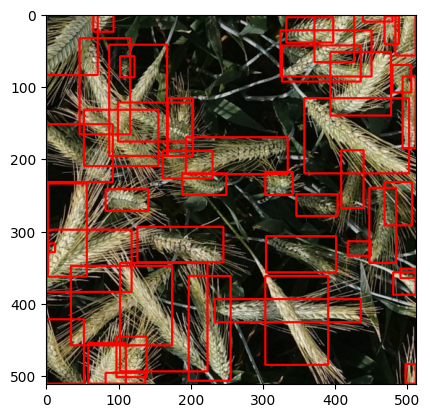

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

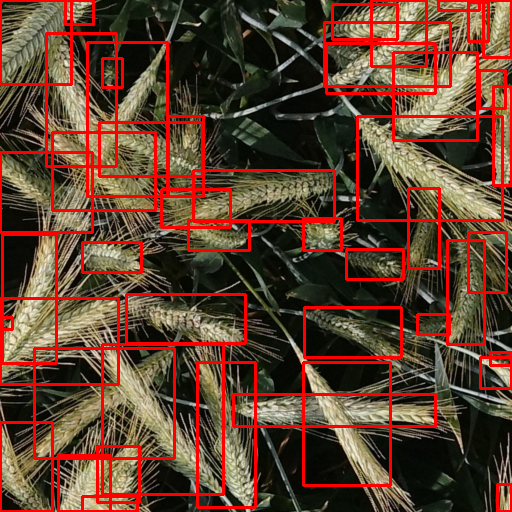

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
def get_size_img(files):
    size = files.findall('size')[0]
    width = size[0].text
    height = size[1].text
    return [width, height]

In [ ]:
w, h = get_size_img(root)
print(w, h)

512 512
